In [15]:
#importar librerias
import numpy as np # permite hacer cálculos lógicos y matemáticos
import pandas as pd # permite hacer manipulación y análisis de datos
import matplotlib.pyplot as plt # permite hacer gráficos
import random # permite generar números aleatorios
from keras.datasets import mnist #importar dataset mnist
from sklearn.model_selection import train_test_split # permite dividir los datos en entrenamiento y prueba
from keras.models import Sequential # crea un modelo secuencial y permite añadir capas
from keras.layers import Dense, Flatten # permite crear capas densas y aplanar
from keras.utils import to_categorical, plot_model # convierte vectores a matrices binarias

In [16]:
# cargar dataset mnist
(X_train, y_train) , (X_test, y_test)  = mnist.load_data()

In [17]:
# visualizar el dataset
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


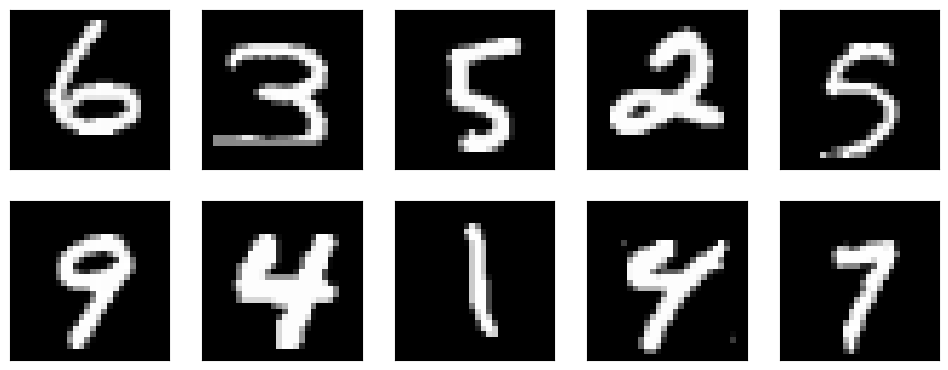

In [18]:
# Mostrar una cuadrícula de imágenes
plt.figure(figsize=(12, 12))

# Cambiar el número de imágenes a mostrar (en este caso, 10)
num_images = 10

# Iterar sobre las imágenes en X_train y mostrarlas
for i in range(num_images):
    random_index = random.randint(0, len(X_train) - 1)  # Elegir un índice aleatorio
    image = X_train[random_index]  # Seleccionar una imagen aleatoria
    plt.subplot(5, 5, i + 1)  # Crear un subplot
    plt.xticks([])  # Eliminar marcas en el eje x
    plt.yticks([])  # Eliminar marcas en el eje y
    plt.grid(False)  # Eliminar la cuadrícula
    plt.imshow(image, cmap=plt.get_cmap('gray'))  # Mostrar la imagen en escala de grises

plt.show()

In [19]:
# ver el tipo de dato del dataset
print(type(X_train))  # Esto imprimirá el tipo de dato de X_train
print(type(y_train))  # Esto imprimirá el tipo de dato de y_train

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
#Convertir a tipo flotante y normalizar los datos
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [21]:
# Mostrar la esquina superior izquierda de la matriz
print(X_train[0][:10, :10])  # Mostrar los primeros 10x10 píxeles

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11764706 0.14117648]
 [0.         0.         0.         0.         0.         0.
  0.         0.19215687 0.93333334 0.99215686]
 [0.         0.         0.         0.         0.         0.
  0.         0.07058824 0.85882354 0.99215686]
 [0.         0.         0.         0.

In [22]:
# red neuronal
def red_neuronal(X_train, y_train, X_test, y_test):

    # Convertir las etiquetas a una representación one-hot
    y_train_cat = to_categorical(y_train, num_classes=10)
    y_test_cat = to_categorical(y_test, num_classes=10)

    # Definir el modelo
    model = Sequential([
        Flatten(input_shape=(28, 28)), #aplanar la imagen
        Dense(64, activation='relu', input_shape=(28, 28, 1)), #capa 1 con 64 capas ocultas
        Dense(64, activation='relu'), #capa 2 con 64 capas ocultas
        Dense(10, activation='softmax')  #capa de salida
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', #optimizador, ajusta los pesos
                  loss='categorical_crossentropy', #funcion de error
                  metrics=['accuracy']) #metrica de evaluacion

    # Entrenar el modelo y guardar el historial
    model.fit(X_train, y_train_cat, epochs=5, batch_size=32, verbose=1) #ajuste a los parametros

    # Evaluar el modelo
    _, accuracy = model.evaluate(X_test, y_test_cat, verbose=0) #evaluacion del modelo

    #guardar modelo
    model.save('modelo_mnist.h5')

    return accuracy

In [23]:
# Llamar a la función para entrener el modelo
accuracy = red_neuronal(X_train, y_train, X_test, y_test)
# Imprimir la precisión
print(f"Precisión de Red Neuronal: {accuracy:.4f}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8610 - loss: 0.4718
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9618 - loss: 0.1278
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9735 - loss: 0.0856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0526


Precisión de Red Neuronal: 0.9740


In [24]:
#probar el modelo
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import requests
from io import BytesIO
from tensorflow.keras.models import load_model

In [25]:
# Cargar el modelo
model = load_model('modelo_mnist.h5')

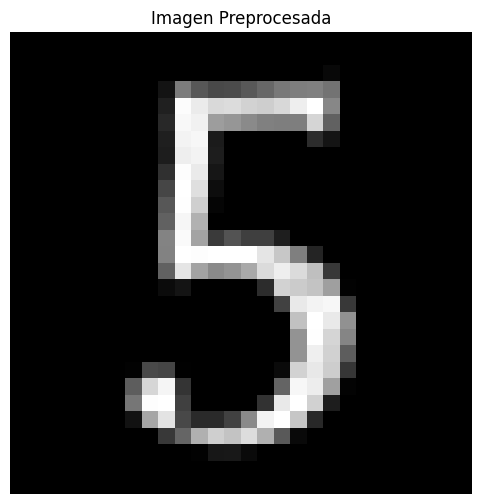

In [26]:
# abrir una imagen de la web
imagen = 'https://thumb.ac-illust.com/b5/b508465fac4f54a40cfdbb2b69707f5a_t.jpeg' #path de la imagen
response = requests.get(imagen)
img = Image.open(BytesIO(response.content)).convert("L")  # Convertir a escala de grises

# Preprocesar la imagen
img = img.resize((28, 28))
img = ImageOps.invert(img)
image_array = np.array(img).reshape(1, 28, 28, 1)  # Cambiar a un array de 4 dimensiones
image_array = image_array / 255.0  # Normalizar

# Convertir la imagen para mostrar con matplotlib
image_to_show = image_array.reshape(28, 28)  # Eliminar la dimensión adicional

# Crear el plot
plt.figure(figsize=(6, 6))
plt.imshow(image_to_show, cmap='gray')  # Usar el mapa de colores 'gray' para imágenes en escala de grises
plt.title("Imagen Preprocesada")
plt.axis('off')  # Ocultar los ejes
plt.show()

In [27]:
#predecir imagen
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print(f"La predicción es: {predicted_class}, prob: {prediction[0][predicted_class]*100}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
La predicción es: 5, prob: 99.98795986175537%
